___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd

#### Load Dataset

In [2]:
df = pd.read_csv("C:/Users/hessa/Downloads/Customer_Segmentation/Mall_Customers (1).csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()
# spending score درجة الانفاق هذي يحسبونها من سجل الشراء 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.info()
# No missing values >_<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df.shape

(200, 5)

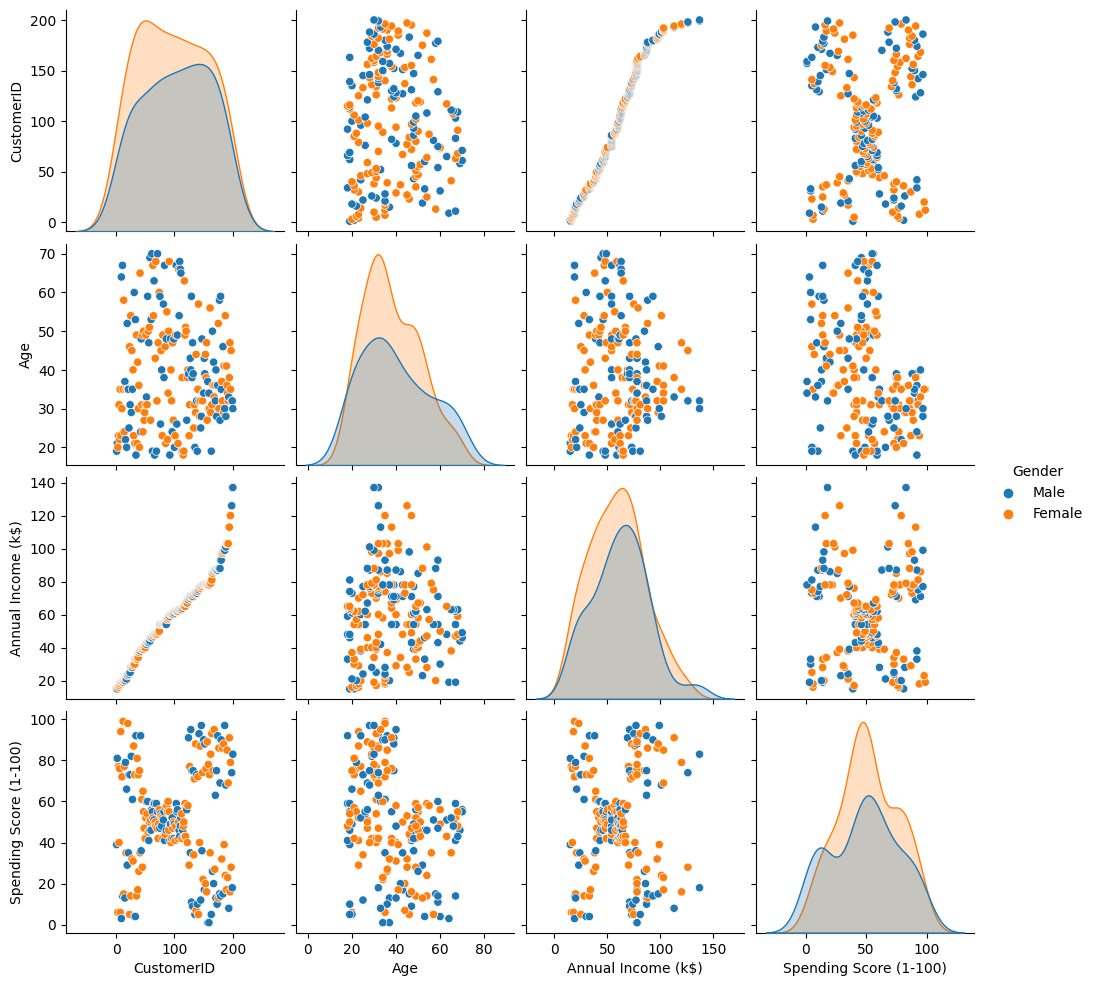

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="Gender")
plt.show()

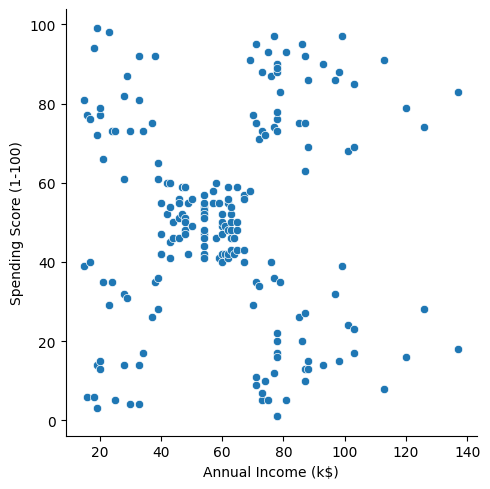

In [10]:
sns.relplot(x='Annual Income (k$)', y= "Spending Score (1-100)", data=df)

In [11]:
# there some relationship with customer who have 40-60 annula incom  

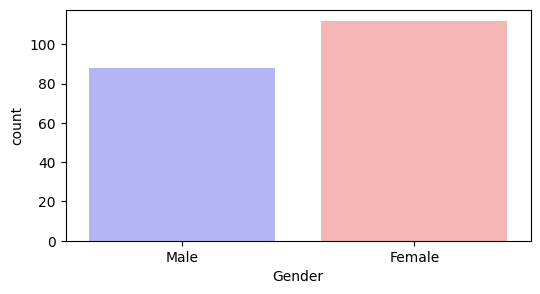

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(x="Gender", data=df, palette="bwr")
plt.show()

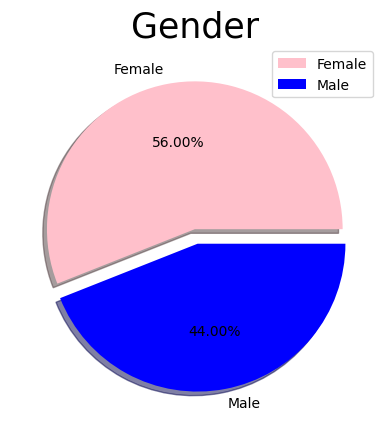

In [13]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 25)
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

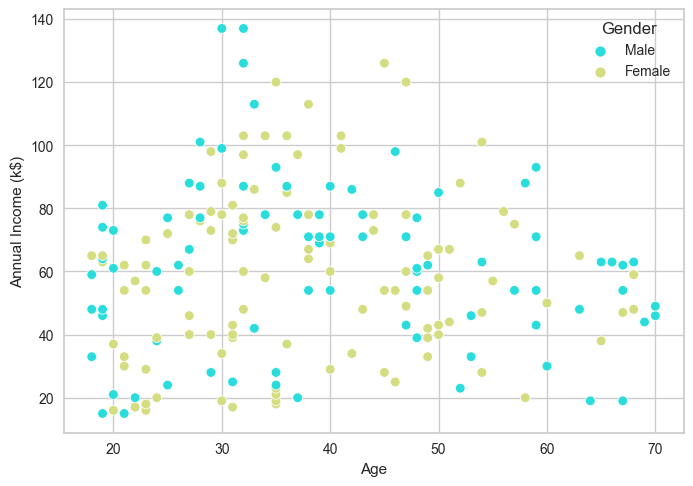

In [84]:
sns.scatterplot(data=df, x=df['Age'], y=df['Annual Income (k$)'], hue='Gender', palette='rainbow')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

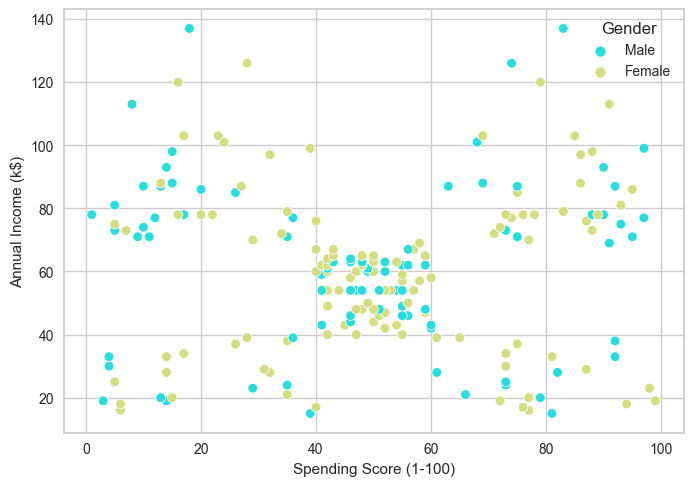

In [83]:
sns.scatterplot(data=df, x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue='Gender', palette='rainbow')

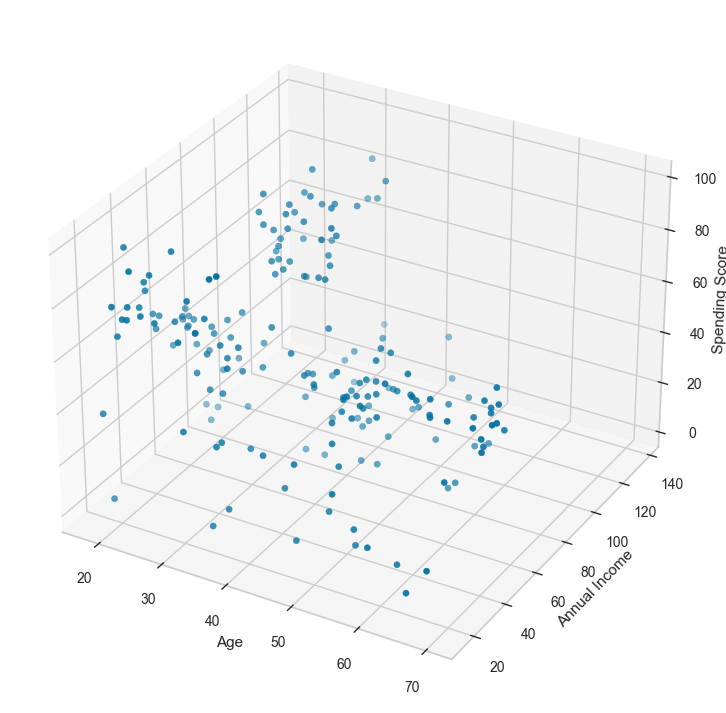

In [132]:
#3D graph 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],c= 'b')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ')
ax.set_zlabel('Spending Score')

plt.show()



In [14]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
                       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr(numeric_only = True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

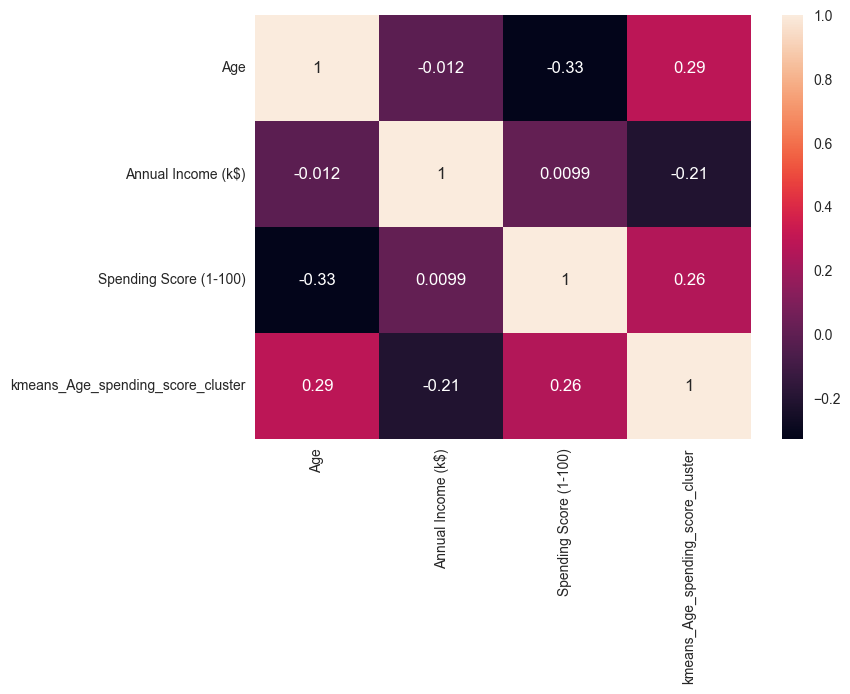

In [76]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

In [17]:
#We should keep in minde the ideal clustering logic which we specify
# as minimal intra-cluster distance and maximmal inter cluster distance 
#at every stage of clustering problems .


# Intra-cluster distance
# It refers to the average distance between data points within the same cluster.

In [18]:
df.drop(columns=['CustomerID'], axis=1, inplace=True)

In [19]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [20]:
%store df

Stored 'df' (DataFrame)


---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [21]:
x = df.loc[:, ["Age", "Spending Score (1-100)"]]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


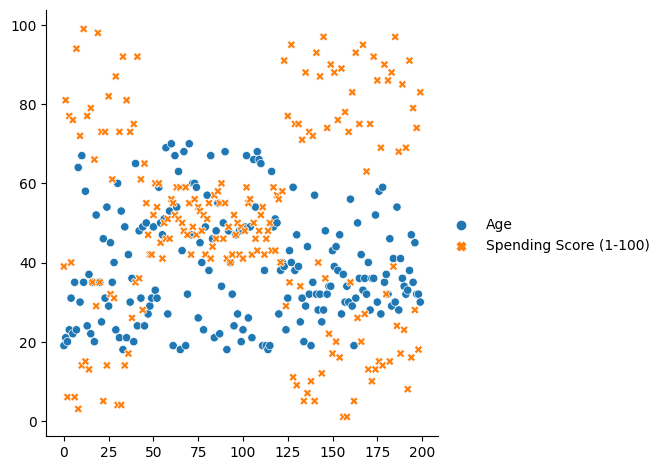

In [22]:
sns.relplot(x)
plt.show()

#### *ii. Determine optimal number of clusters*

In [23]:
# find optimal number 
from sklearn.cluster import KMeans
sum_of_square_error = []
K=range(1,11)
# For each k value, we will initialise k-means and use the inertia attribute to 
# identify the sum of squared distances of samples to the nearest cluster centre.
for k in K:
    Kmeans = KMeans(n_clusters=k)
    Kmeans = Kmeans.fit(x)
    sum_of_square_error.append(Kmeans.inertia_)
    # inertia_ or whithin-cluster-sum-of-square-erro


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [24]:
x.ndim

2

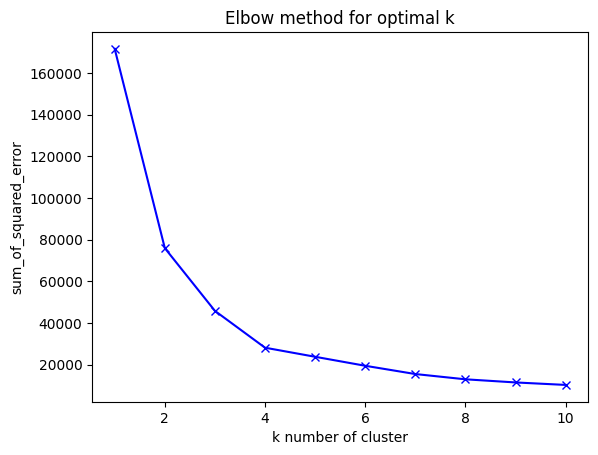

In [25]:
plt.plot(K, sum_of_square_error, 'bx-')

plt.xlabel('k number of cluster')
plt.ylabel('sum_of_squared_error')

plt.title("Elbow method for optimal k")
 
plt.show()

#the plot below ,the elbow is at k=4 indicating the optimal k for this dataset is 4

# elbw graph show us which number of cluster is minimum WCSS value

In [26]:
# we will consider the optimal number of cluster that is sutable for data is 4 


In [27]:
# as u can see the data is devided into 4 clusters (0,1,2,3)

In [28]:
from sklearn.metrics import silhouette_score


K = range(2,11)
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


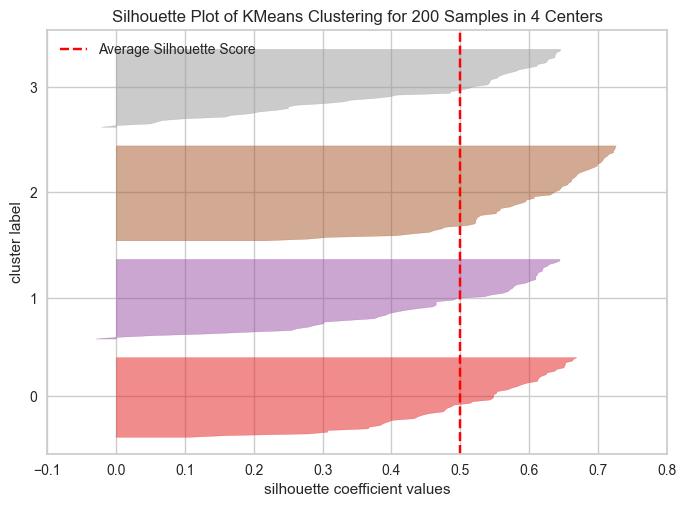

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(x)
visualizer.poof()

### Why silhouette_score is negative?

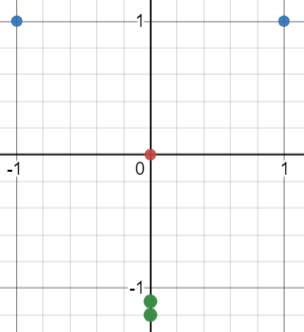

#### *iii. Apply K Means*

In [31]:
Kmeans = KMeans(n_clusters=4, random_state=0)

kmeans_cluster = Kmeans.fit_predict(x)
kmeans_cluster

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [32]:
x['kmeans_cluster'] = kmeans_cluster
x.head()

,Age,Spending Score (1-100),kmeans_cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


In [33]:
#check for centroid 
Kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

In [34]:
x.head()

,Age,Spending Score (1-100),kmeans_cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


#### *iv. Visualizing and Labeling All the Clusters*

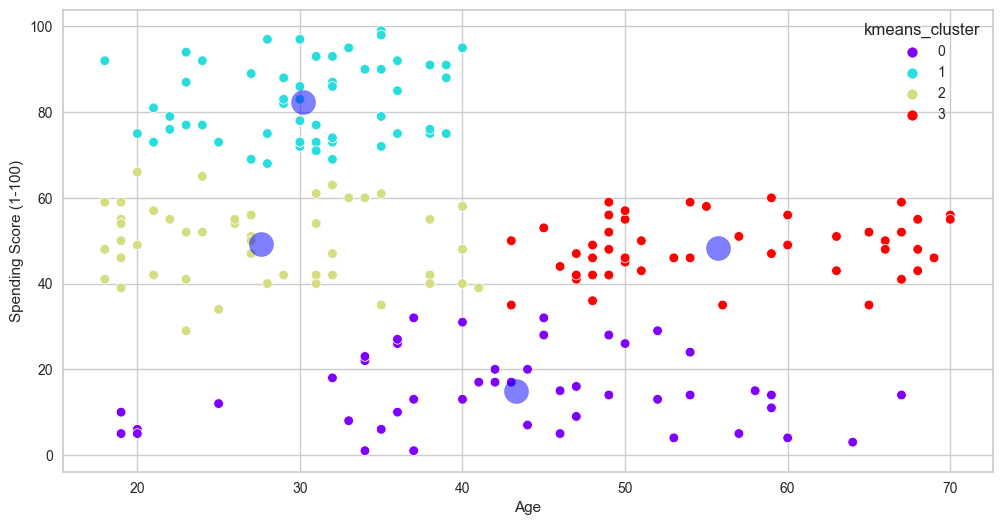

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)',data=x, hue='kmeans_cluster', palette='rainbow')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], c='blue',s=300 , alpha=0.5);

In [36]:
# plt.figure(figsize=(14,8))
# sns.scatterplot(x='Age', y='Spending Score (1-100)',data=x, hue='kmeans_cluster', palette='rainbow')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [37]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [38]:
x2 = df.iloc[:,[2,3]]
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

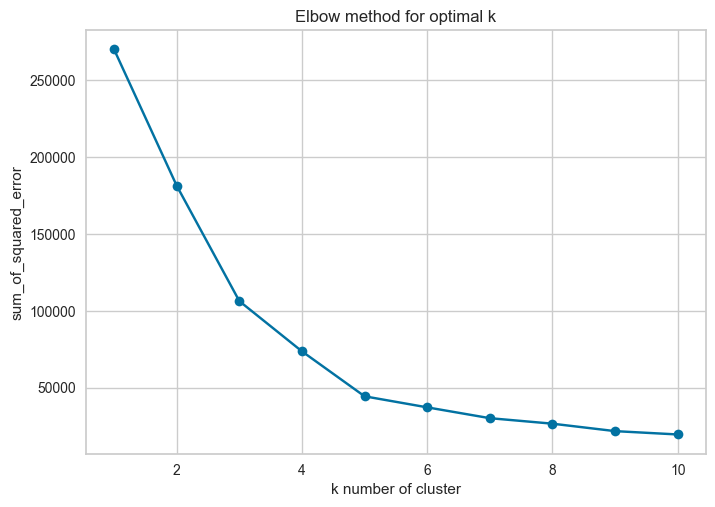

In [125]:
# find the optimal n of clusters Using Elbow Curve Method
sum_of_square_error = []
K=range(1,11)
# For each k value, we will initialise k-means and use the inertia attribute to 
# identify the sum of squared distances of samples to the nearest cluster centre.
for k in K:
    Kmeans = KMeans(n_clusters=k)
    Kmeans = Kmeans.fit(x2)
    sum_of_square_error.append(Kmeans.inertia_)



plt.plot(K, sum_of_square_error, 'bo-')

plt.xlabel('k number of cluster')
plt.ylabel('sum_of_squared_error')

plt.title("Elbow method for optimal k")
 
plt.show()

In [40]:
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [41]:
from sklearn.metrics import silhouette_score

K = range(2,11)
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


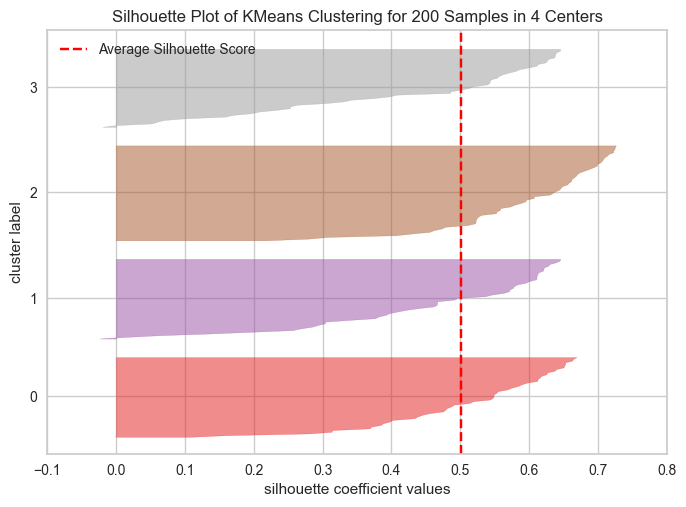

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model_kmeans2 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_kmeans2)
visualizer.fit(x)
visualizer.poof()

#### *iii. Apply K Means*

In [43]:
kmeans2 = KMeans(n_clusters=5, random_state=0)
kmeans2.fit_predict(x2) 


#we see n of cluster is 5

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [44]:


x2['kmeans_cluster2'] = kmeans2.fit_predict(x2)
x2.head()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hessa\AppData\Local\Temp\ipykernel_9840\509975355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['kmeans_cluster2'] = kmeans2.fit_predict(x2)


,Annual Income (k$),Spending Score (1-100),kmeans_cluster2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [45]:
x2.head()

,Annual Income (k$),Spending Score (1-100),kmeans_cluster2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [46]:
Kmeans.cluster_centers_

array([[ 30.        ,  34.61538462],
       [109.7       ,  22.        ],
       [ 82.38888889,  90.44444444],
       [ 25.0952381 ,  80.04761905],
       [ 48.1       ,  52.675     ],
       [ 24.58333333,   9.58333333],
       [ 79.73913043,  13.39130435],
       [ 63.57142857,  46.57142857],
       [114.71428571,  78.42857143],
       [ 77.78571429,  73.28571429]])

#### *iv. Visualizing and Labeling All the Clusters*

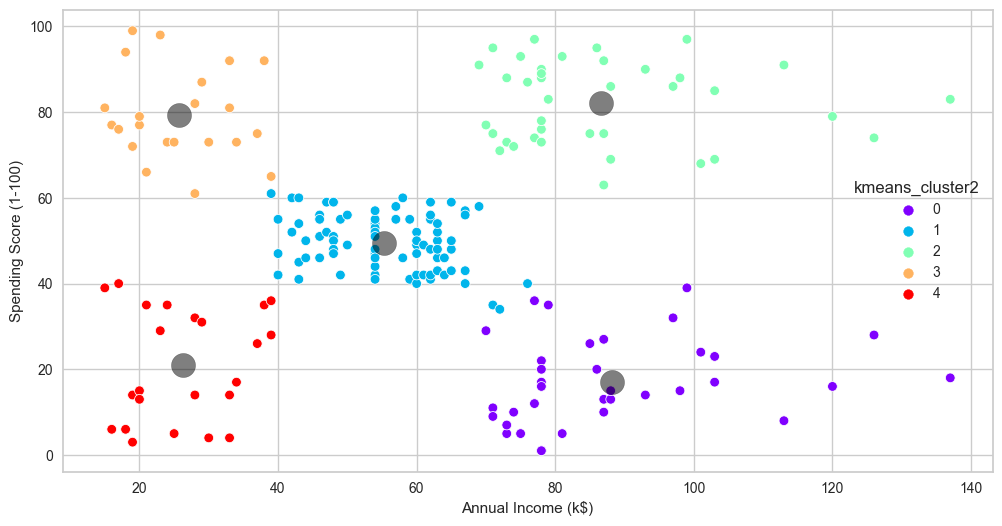

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x2['Annual Income (k$)'], y=x2['Spending Score (1-100)'], data=x2,hue='kmeans_cluster2', palette='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# centroied :
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], c='black',s=300 , alpha=0.5 )
plt.show()



In [48]:
x2

,Annual Income (k$),Spending Score (1-100),kmeans_cluster2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [49]:
%store x2


Stored 'x2' (DataFrame)


In [50]:
# x3 = df.iloc[:,1:]
# len(x3['Spending Score (1-100)'])

In [51]:
# wcss = []
# K=range(1, 11)
# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans = kmeans.fit(x3)
#     wcss.append(kmeans.inertia_)

# plt.plot(K,wcss, 'bx-')

# plt.xlabel('k number of cluster')
# plt.ylabel('sum_of_squared_error')

# plt.title("Elbow method for optimal k")
 
# plt.show()

In [52]:
# kmeans = KMeans(n_clusters=5)
# label = kmeans.fit_predict(x3)
# label

In [53]:
x1 = df.iloc[:,[1,3]]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


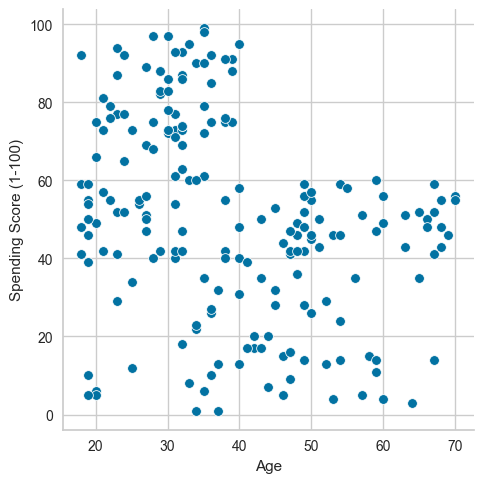

In [54]:
sns.relplot(x='Age', y="Spending Score (1-100)", data=x1)


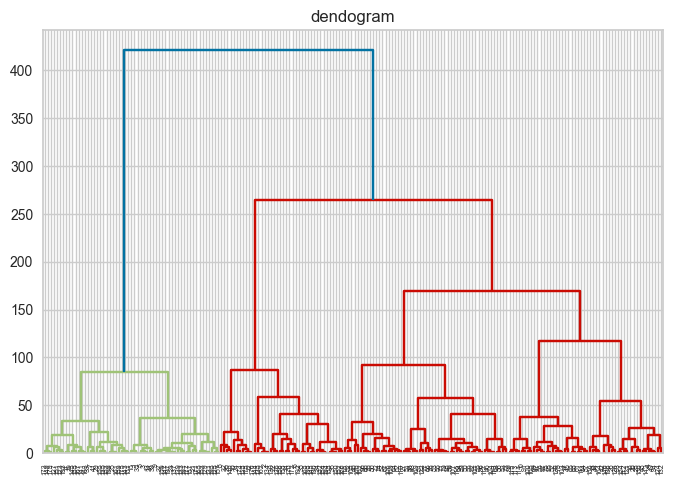

In [55]:
#identify optimal number of clusters using Dendogram
#A dendrogram is a tree-like diagram that records the sequences of merges or splits.

import scipy.cluster.hierarchy as shc
plt.title("dendogram")
dendogram = shc.dendrogram(shc.linkage(x1, method = "ward"))


In [59]:
# unique_color = set(dendogram['color_list'])
# unique_color

{'C0', 'C1', 'C2'}

In [60]:
# optimal_number_clusters = len(unique_color)- 1
# optimal_number_clusters
# # i consider the of optimal no of clusters is 2

2

In [61]:
x2 = df.iloc[:,[2,3]]
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Dendrogram')

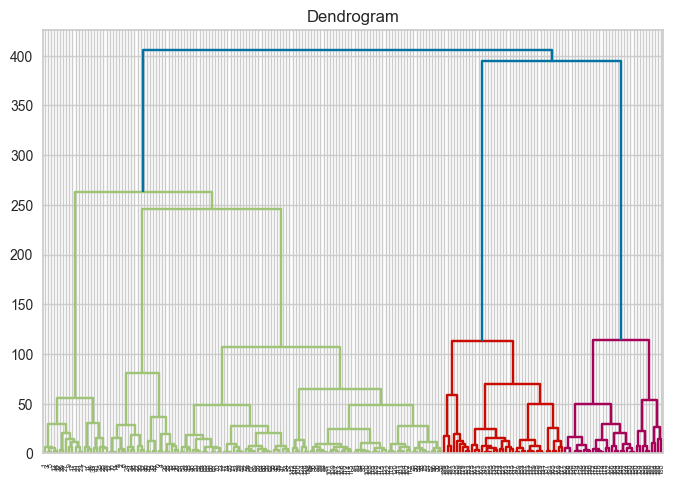

In [62]:
dendogram = shc.dendrogram(shc.linkage(x2, method = "ward"))
plt.title('Dendrogram')

In [63]:
%store x

Stored 'x' (DataFrame)


#### Interpretation based on Age and Spending Score- x1

In [64]:
x1.mean().T

Age                       38.85
Spending Score (1-100)    50.20
dtype: float64

In [65]:
%store -r x
x.head()

,Age,Spending Score (1-100),kmeans_cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


In [66]:
x_count = x.kmeans_cluster.value_counts()


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

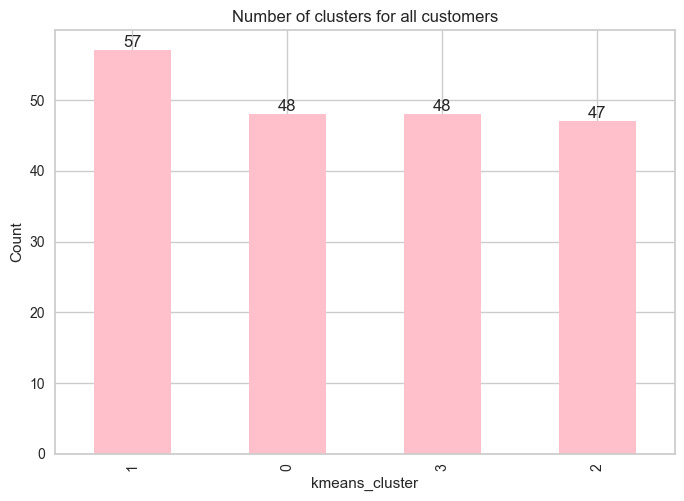

In [67]:
plt.title("Number of clusters for all customers")
plt.xlabel('Clusters')
plt.ylabel('Count')
ax = x_count.plot(kind='bar', color='pink')
ax.bar_label(ax.containers[0])

In [68]:
# balanced distrbution ^

In [69]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [70]:
df['kmeans_Age_spending_score_cluster'] = x.kmeans_cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_Age_spending_score_cluster
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,2


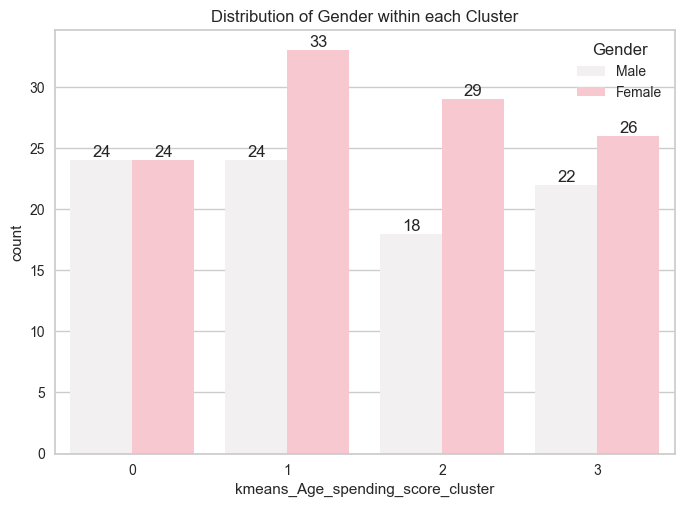

In [71]:
# show the distribution of 'Gender' within each cluster of Age and spending score
ax = sns.countplot(data=df, x='kmeans_Age_spending_score_cluster', hue='Gender',color='pink')
plt.title('Distribution of Gender within each Cluster')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

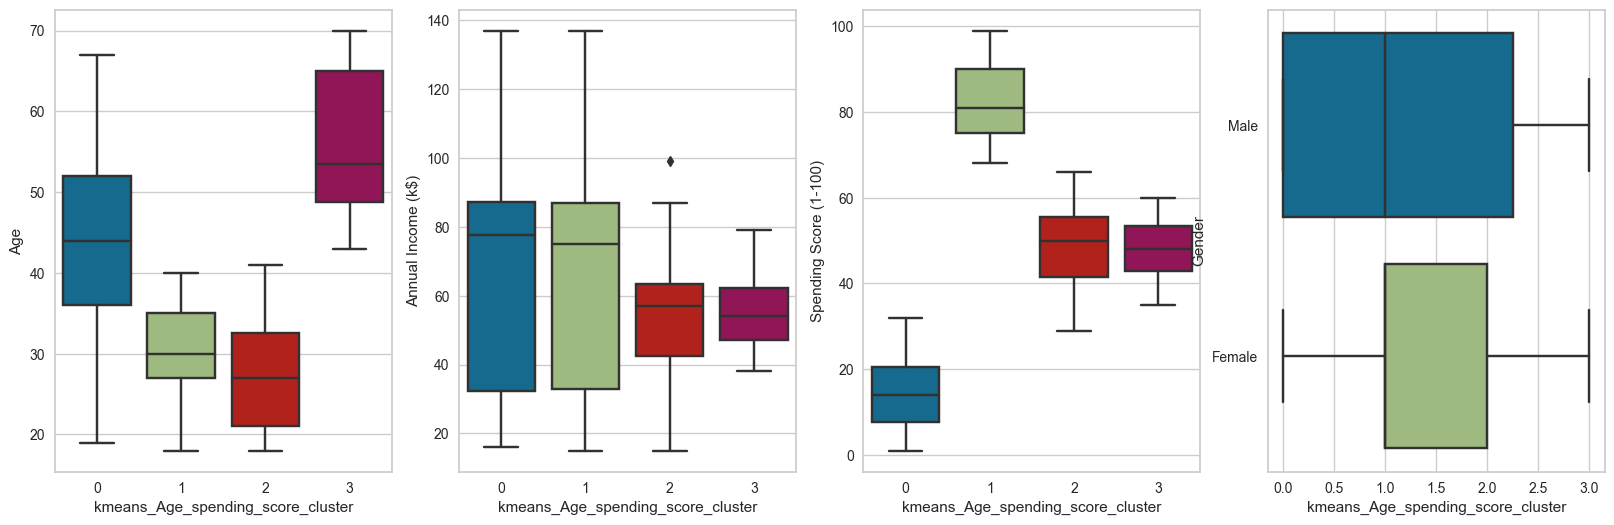

In [72]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "kmeans_Age_spending_score_cluster", data = df)

plt.subplot(142)
sns.boxplot(y = "Annual Income (k$)", x = "kmeans_Age_spending_score_cluster", data = df)

plt.subplot(143)
sns.boxplot(y = "Spending Score (1-100)", x = "kmeans_Age_spending_score_cluster", data = df)

plt.subplot(144)
sns.boxplot(y = "Gender", x = "kmeans_Age_spending_score_cluster", data = df);

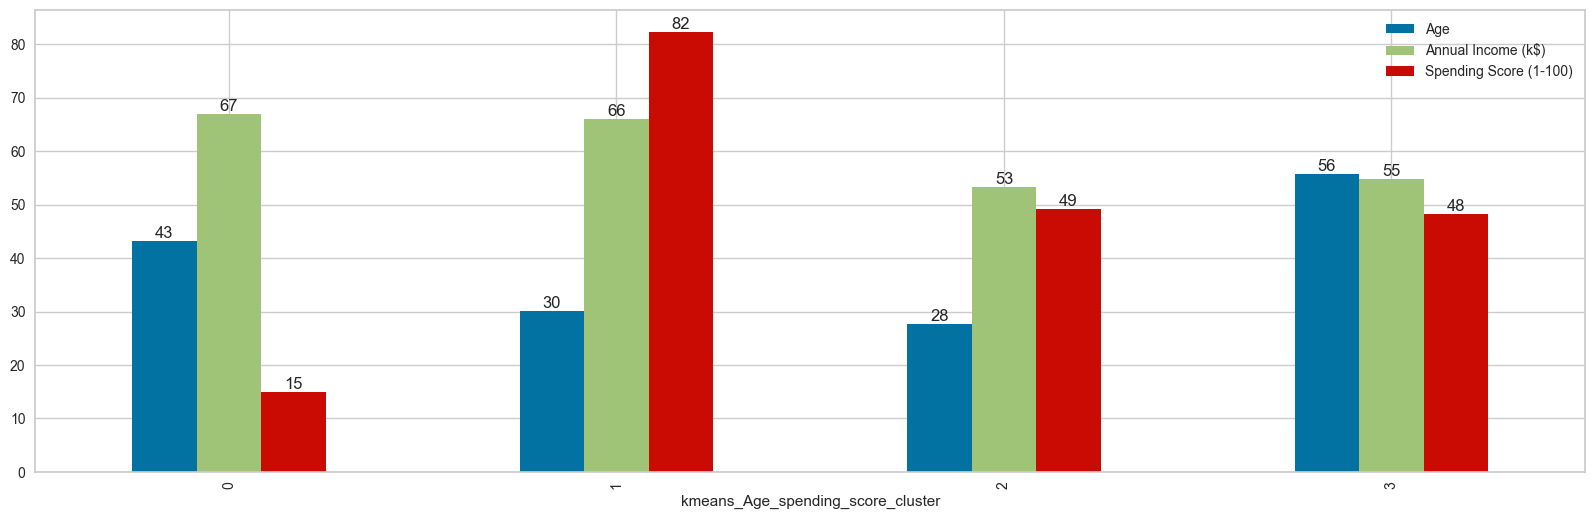

In [73]:
ax = df.drop(columns='Gender').groupby("kmeans_Age_spending_score_cluster").mean().plot(kind='bar', figsize = (20,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

#### Interpretation based on Annual Income and Spending Score- x2

In [74]:
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [75]:
count_c = x2.kmeans_cluster2.value_counts()
count_c

AttributeError: 'DataFrame' object has no attribute 'kmeans_cluster2'

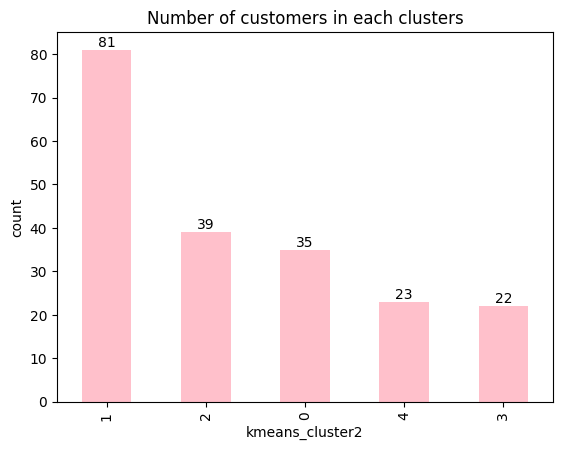

In [ ]:
plt.title("Number of customers in each clusters")
plt.xlabel("customers")
plt.ylabel("count")
ax = count_c.plot(kind='bar', color='pink')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
%store -r x2

In [ ]:
df.drop(columns='kmeans_Age_spending_score_cluster', inplace=True)


In [ ]:
df['kmeans_Annual Income_spending_score_cluster'] = x2.kmeans_cluster2
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_Annual Income_spending_score_cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


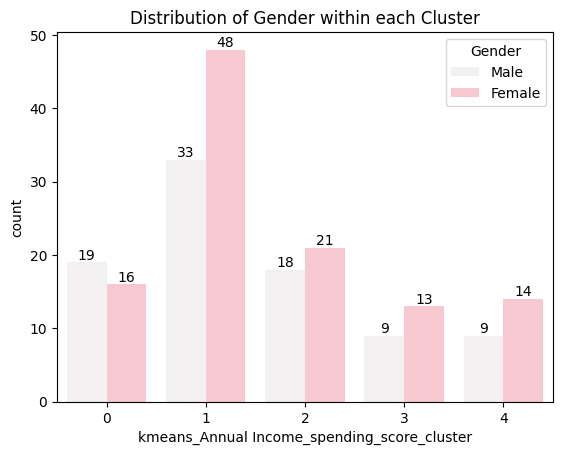

In [ ]:
# show the distribution of 'Gender' within each cluster of Age and spending score
ax = sns.countplot(data=df, x='kmeans_Annual Income_spending_score_cluster', hue='Gender',color='pink')
plt.title('Distribution of Gender within each Cluster')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

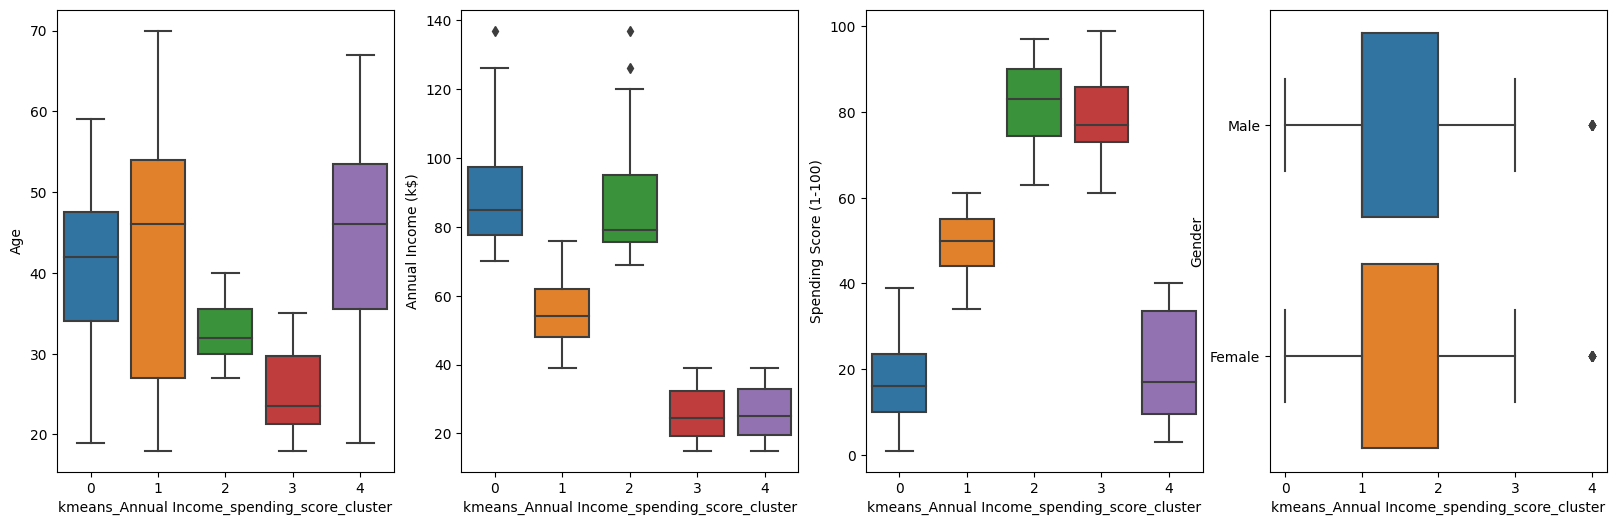

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "kmeans_Annual Income_spending_score_cluster", data = df)

plt.subplot(142)
sns.boxplot(y = "Annual Income (k$)", x = "kmeans_Annual Income_spending_score_cluster", data = df)

plt.subplot(143)
sns.boxplot(y = "Spending Score (1-100)", x = "kmeans_Annual Income_spending_score_cluster", data = df)

plt.subplot(144)
sns.boxplot(y = "Gender", x = "kmeans_Annual Income_spending_score_cluster", data = df);

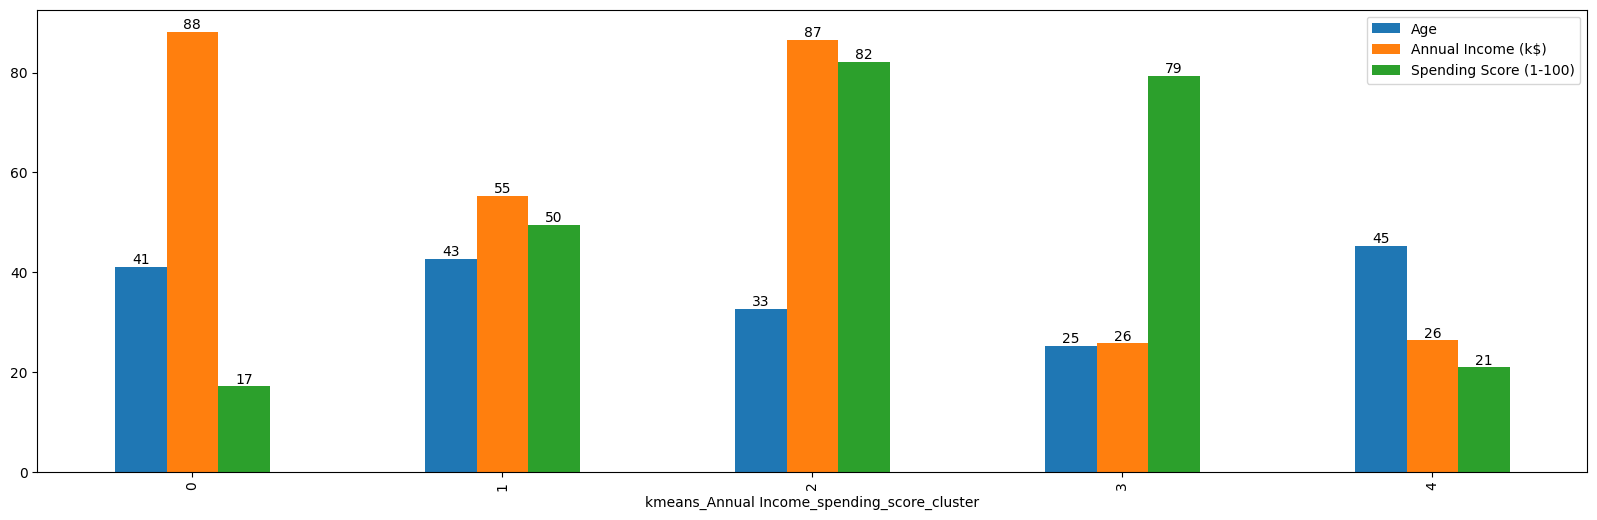

In [ ]:
ax = df.drop(columns='Gender').groupby("kmeans_Annual Income_spending_score_cluster").mean().plot(kind='bar', figsize = (20,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

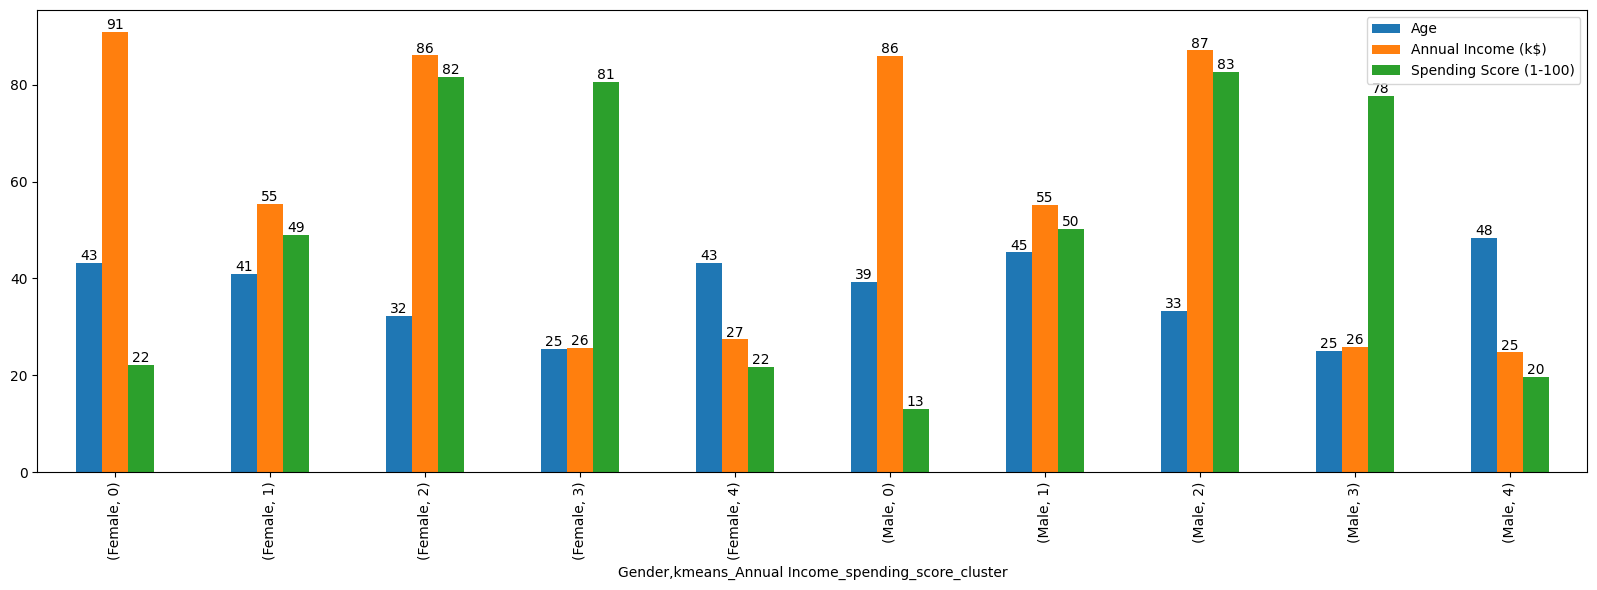

In [ ]:
ax = df.groupby(["Gender","kmeans_Annual Income_spending_score_cluster"]).mean().plot(kind='bar', figsize = (20,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

In [ ]:
# We see the women spend more than man ^^

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___